In [1]:
# 最急降下法

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('slr06.csv')

In [4]:
data_x = data['X']
data_y = data['Y']

In [ ]:
#  J(w0, w1) = 1 / 2n * ∑i=1 n(^yi − yi) ** 2

In [6]:
def cost(w0, w1, x, y):
    cost = ((w1 * x + w0) - y) ** 2
    return cost.mean() / 2

In [11]:
w0, w1 = 0, 0
cost_0 = cost(w0, w1, data_x, data_y)

In [12]:
y2 = data_y ** 2

In [13]:
y2.mean()

17145.798412698416

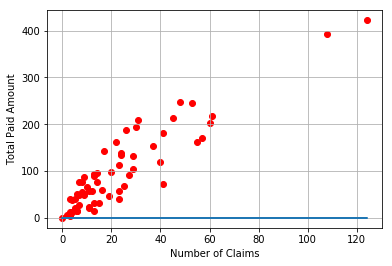

In [14]:
# 仮定モデルとデータの確認
plt.scatter(data_x, data_y, c='r')
plt.xlabel('Number of Claims')
plt.ylabel('Total Paid Amount')

plt.plot(data_x, data_x * w1 + w0, '-')
plt.grid(True)
plt.show()

In [15]:
alpha = 0.001
init_w0 = 0
init_w1 = 0
iterations = 10000

In [ ]:
# 最急降下法
#  w0 := w0 − α * 1 / m * ∑i=1 m(^yi − yi)
#  w1 := w1 − α * 1 / m * ∑m=1 m(^yi − yi) * xi

In [34]:
# 一バッチ分の更新処理
# 入力
# w0：更新前の W0
# w1：更新前の W1
# x：クレーム数（特徴量）
# y：正解値（目的変数、支払い金額）
# alpha：学習率
# return
# after_w0：更新後の w0
# after_w1：更新後の w1
def grad(w0, w1, x, y, alpha):
    after_w0, after_w1 = w0, w1
    cost_y = w1 * x + w0 - y
    cost_x = (w1 * x + w0 - y) * x
    after_w0 = w0 - alpha * cost_y.mean()
    after_w1 = w1 - alpha * cost_x.mean()
    return after_w0, after_w1

In [35]:
# 指定された回数分パラメータを更新
# 入力
# x：クレーム数（特徴量）
# y：正解値（目的変数、支払い金額）
# init_w0：更新前の W0
# init_w1：更新前の W1
# alpha：学習率
# iterations：バッチ数
# return
# return_w0：更新後の w0
# return_w1：更新後の w1
# j_history：パラメータの履歴
def run(x, y, init_w0, init_w1, alpha, iterations):
    return_w0, return_w1 = init_w0, init_w1
    j_history = np.zeros((iterations, 1))
    for i in range(iterations):
        return_w0, return_w1 = grad(return_w0, return_w1, x, y, alpha)
        j_history[i] = cost(return_w0, return_w1, x, y)
    return return_w0, return_w1, j_history

In [38]:
w0, w1, j_hisory = run(data_x, data_y, init_w0, init_w1, alpha, iterations)

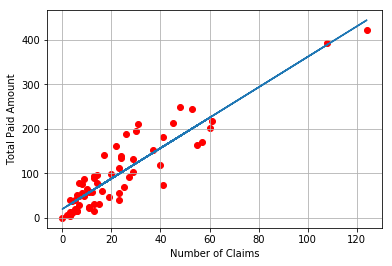

In [39]:
# モデルとデータの確認
plt.scatter(data_x, data_y, c='r')
plt.xlabel('Number of Claims')
plt.ylabel('Total Paid Amount')

plt.plot(data_x, data_x * w1 + w0, '-')
plt.grid(True)
plt.show()

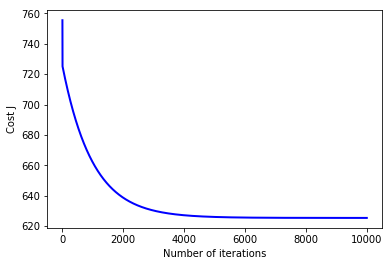

In [40]:
# コストの確認
plt.plot(range(j_hisory.size), j_hisory, '-b', linewidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

In [41]:
# 最急降下法の線形回帰モデルのRMSE
least_y = (w1 * data_x + w0 - data_y) ** 2
RMSE = np.sqrt(least_y.mean())

In [42]:
RMSE

35.36594510786303